In [1]:
# exploring data in my new database!

In [34]:
import pymysql as mdb
import json
import re
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import math as math
from IPython.display import display
from IPython.core.pylabtools import getfigs
import seaborn as sns

In [22]:
%matplotlib qt
#matplotlib inline

In [5]:
con = mdb.connect('localhost','root','hobbes','kickstarter');

In [6]:
with con:
    cur = con.cursor()
    cur.execute("SHOW DATABASES")
    
    rows = cur.fetchall()
    for row in rows:
        print row
    cur.close()

('information_schema',)
('kickscrape',)
('kickstarter',)
('mysql',)
('performance_schema',)
('test',)
('testdb',)
('world_innodb',)


In [7]:
with con:
    cur = con.cursor()
    cur.execute("DESCRIBE Project_info")
    rows = cur.fetchall()
    for row in rows:
        print row[0]
    cur.close()

Id
Creator_name
Creator_url
Currency
Project_id
Category_name
Category_slug
Goal
Pledged
Project_date
Country
Location_club
Location_name
Blurb
N_backers
Name
URL
Launch_time
End_time


In [8]:
with con:
    cur = con.cursor()
    cur.execute("SELECT DISTINCT Category_name from Project_info")
    unique_category_names = cur.fetchall()
    
    cur.execute("SELECT DISTINCT Category_slug from Project_info")
    unique_category_slugs = cur.fetchall()
    
    cur.close()

In [14]:
for cat in unique_category_slugs:
    print cat[0]

theater/musical
theater
theater/plays
theater/spaces
theater/immersive
theater/festivals
theater/experimental
technology/gadgets
technology/sound
technology
technology/apps
technology/wearables
technology/diy electronics
technology/hardware
technology/web
technology/space exploration
technology/3d printing
technology/robots
technology/makerspaces
technology/software
technology/camera equipment
technology/fabrication tools
technology/flight
publishing
publishing/children's book
publishing/art book
publishing/fiction
publishing/anthologies
publishing/zines
publishing/literary journals
publishing/radio & podcast
publishing/nonfiction
publishing/poetry
publishing/young adult
publishing/periodical
publishing/calendars
publishing/academic
publishing/translations
photography/photobooks
photography/fine art
photography
photography/places
photography/nature
photography/animals
photography/people
music/electronic music
music/indie rock
music/rock
music
music/classical music
music/country & folk


In [17]:
# print master categories
for cat in unique_category_slugs:
    this_cat = cat[0]
    match = re.search(r'\/', this_cat)
    # If-statement after search() tests if it succeeded
    if not match:                      
        print this_cat

theater
technology
publishing
photography
music
journalism
games
food
film & video
fashion
design
dance
crafts
comics
art


In [20]:
# start by plotting pledged, goal

In [20]:
with con:
    cur = con.cursor()
    cur.execute("SELECT Goal, Pledged FROM Project_info LIMIT 5000")
    output = cur.fetchall()
    
    pledged_goal_array = np.array(output)
    
    cur.close()

In [35]:
fig = plt.figure(figsize=(4, 6))
plt.plot(pledged_goal_array[:,0]/1e6,pledged_goal_array[:,1]/1e6,'.b')

plt.plot((0, 1), (0, 1), 'k-',linewidth=1)
plt.xlabel('Kickstarter goal (millions of currency)')
plt.ylabel('Raised money (millions of currency)')

In [97]:
saveas_path = '/Users/jamie/insight data/figures/'

In [30]:
plt.savefig(saveas_path+'pledged v goal.png',\
                bbox_inches='tight',dpi=200)

In [60]:
with sns.axes_style("white"):
    j = sns.jointplot(pledged_goal_array[:,0]/1e6,\
                      pledged_goal_array[:,1]/1e6,\
                      xlim=(0,.2),ylim=(0,.2));

In [59]:
plt.show()

In [61]:
plt.savefig(saveas_path+'pledged v goal joint plot.png',\
                bbox_inches='tight',dpi=200)

In [75]:
plt.close('all')

In [63]:
# this figure for the first 5,000 campaigns, which I think
# is biased towards successful theater campaigns. Redo this
# with one category.

In [78]:
with con:
    cur = con.cursor()
    cur.execute("SELECT Goal, Pledged FROM Project_info WHERE Category_slug LIKE 'technology%'")
    output = cur.fetchall()
    
    pledged_goal_array = np.array(output)
    
    cur.close()

In [103]:
np.shape(pledged_goal_array)

(9351, 2)

In [95]:
with sns.axes_style("white"):
    j = sns.jointplot(pledged_goal_array[:,0]/1e6,\
                      pledged_goal_array[:,1]/1e6,
                      xlim=(0,1),ylim=(0,1));
    j.set_axis_labels('Kickstarter goal (millions of currency)',\
                      'Pledged (millions of currency)') 

In [98]:
plt.savefig(saveas_path+'Technology pledged v goal joint plot.png',\
                bbox_inches='tight',dpi=200)

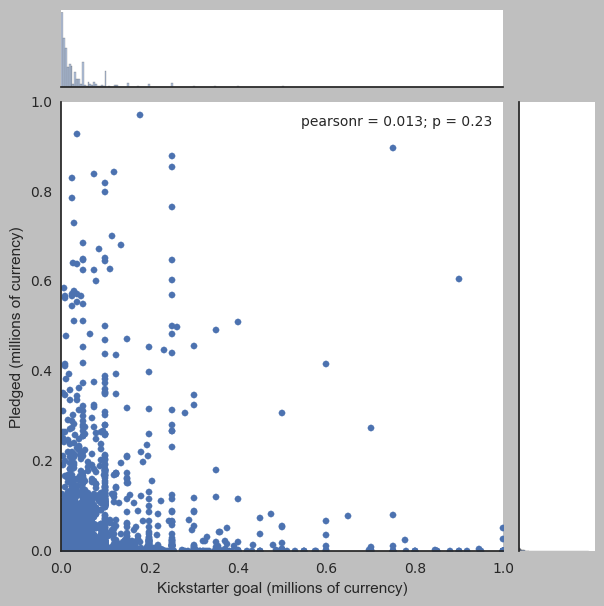

In [99]:
#embed this figure, then close all
display(plt.gcf())
plt.close('all')

In [100]:
# now make a histogram of campaign durations
with con:
    cur = con.cursor()
    cur.execute("SELECT End_time-Launch_time FROM Project_info WHERE Category_slug LIKE 'technology%'")
    output = cur.fetchall()
    
    Campaign_duration = np.array(output)
    
    cur.close()

In [102]:
np.shape(Campaign_duration)

(9351, 1)

In [105]:
seconds_per_day = 86400

In [118]:
fig = plt.figure()
sns.set_style("white")
plt.hist(Campaign_duration/seconds_per_day, 30, color=sns.desaturate("indianred", .75));
plt.ylabel('Frequency (n campaigns)')
plt.xlabel('Campaign duration (days)')

In [119]:
plt.savefig(saveas_path+'Technology campaign length histograms.png',\
                bbox_inches='tight',dpi=200)

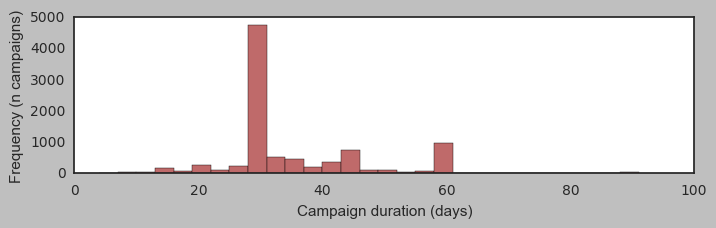

In [120]:
#embed this figure, then close all
display(plt.gcf())
plt.close('all')